In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [2]:
knmi_data = pd.read_csv('data/knmi_data_weather.txt', skiprows=9, index_col=1, parse_dates=True, skipinitialspace=True)
rws_discharge_data = pd.read_csv('data/rws_data_discharge.csv', delimiter=';', parse_dates=[['WAARNEMINGDATUM', 'WAARNEMINGTIJD (MET/CET)']], index_col=0)
rws_water_temp_data = pd.read_csv('data/rws_data_watertemp.csv', delimiter=';', parse_dates=[['WAARNEMINGDATUM', 'WAARNEMINGTIJD (MET/CET)']], index_col=0)

C:\Users\Jip\AppData\Local\Temp\ipykernel_620\3462304345.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  rws_water_temp_data = pd.read_csv('data/rws_data_watertemp.csv', delimiter=';', parse_dates=[['WAARNEMINGDATUM', 'WAARNEMINGTIJD (MET/CET)']], index_col=0)


In [4]:
discharge = pd.DataFrame(rws_discharge_data['ALFANUMERIEKEWAARDE'])
discharge.index = pd.to_datetime(discharge.index, format='%d/%m/%Y %H:%M:%S')
temperature = pd.DataFrame(rws_water_temp_data['ALFANUMERIEKEWAARDE'])
temperature.index = pd.to_datetime(temperature.index, format='%d/%m/%Y %H:%M:%S')
discharge = discharge.rename(columns={'ALFANUMERIEKEWAARDE': 'Discharge (m3/s)'})
temperature = temperature.rename(columns={'ALFANUMERIEKEWAARDE': 'Temperature (C)'})
temperature_air = pd.DataFrame(knmi_data.loc['2010':]['TG'] / 10)
temperature_air = temperature_air[temperature_air.index.year >= 2012].rename(columns={'TG': 'Air Temperature'})


In [7]:
discharge_W = discharge.resample('W').mean()
temperature_W = temperature.resample('W').mean()
temperature_air_W = temperature_air.resample('W').mean()
total_data = pd.concat([discharge_W, temperature_W, temperature_air_W], axis=1).dropna()
total_data = total_data.rename(columns={'Discharge (m3/s)': 'Discharge', 'Temperature (C)': 'Water temperature', 'Air Temperature': 'Air Temperature'})
keys = total_data.keys()

total_data.loc['2020']

,Discharge,Water temperature,Air Temperature
2020-01-05,614.185083,6.464911,4.600000
2020-01-12,426.344246,6.903812,7.642857
2020-01-19,472.245040,6.887599,7.114286
2020-01-26,312.155754,5.351544,2.828571
2020-02-02,450.216270,6.335928,8.228571
2020-02-09,1203.623016,7.379762,6.357143
2020-02-16,1067.025794,6.681132,7.800000
2020-02-23,903.019841,7.540417,7.700000
2020-03-01,927.989087,7.386792,5.514286
2020-03-08,1240.415675,7.012103,6.214286


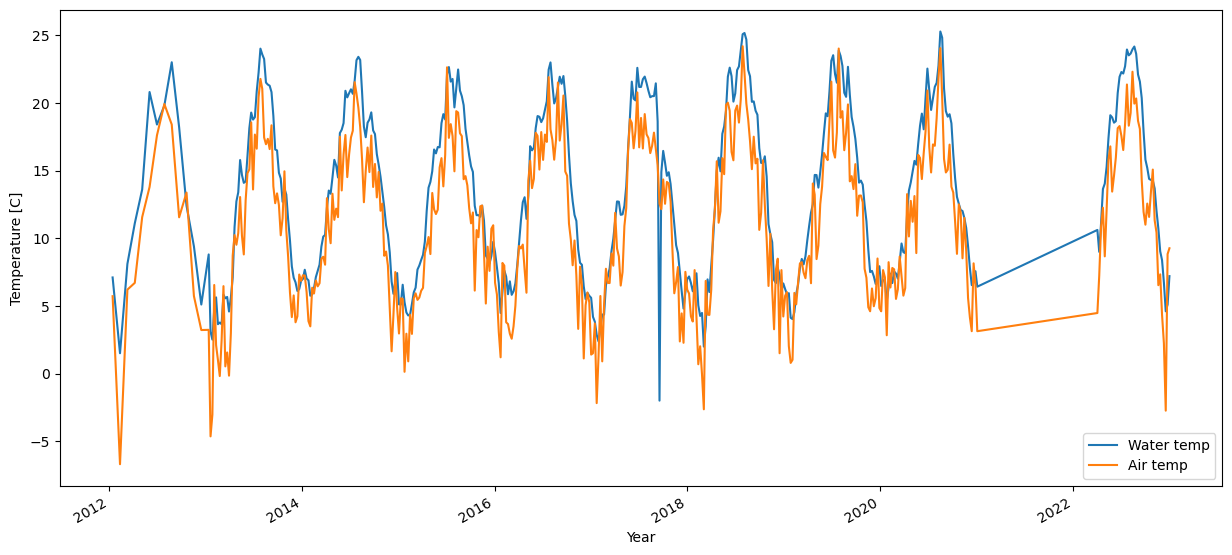

In [18]:
plt.figure(figsize=(15,7))
total_data[keys[1]].plot(label='Water temp')
total_data[keys[2]].plot(label='Air temp')
plt.ylabel('Temperature [C]')
plt.xlabel('Year')
plt.legend()

In [ ]:
temp_delta_2080 = 4 # degrees https://www2.cesm.ucar.edu/experiments/cesm1.0/diagnostics/b40.rcp8_5.1deg.001/lnd_2080-2099-b40.20th.track1.1deg.005/set1/set1_TSA.gif
# since water temp follows air temp pretty closely, we can add 4 degrees everywhere
total_data['Water temperature 2080'] = total_data['Water temperature'] + temp_delta_2080
discharge_delta_2080 = 0.93 / 0.76 # runoff increase factor https://www2.cesm.ucar.edu/experiments/cesm1.0/diagnostics/b40.rcp8_5.1deg.001/lnd_2080-2099-b40.20th.track1.1deg.005/set1/set1_TOTRUNOFF.gif
# since runoff increases, total discharge will increase


# https://www2.cesm.ucar.edu/experiments/cesm1.0/diagnostics/b40.rcp8_5.1deg.001/lnd_2080-2099-b40.20th.track1.1deg.005/set3/set3_landf_Europe.gif